<a href="https://colab.research.google.com/github/ogundipe/AkinwaleDataScience/blob/master/Final_KMeans_model2Plus_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.7 MB/s eta 0:00:00


In [2]:
import os
import math
import datetime
import numpy as np
import plotly as py
import pandas as pd
import seaborn as sns
from scipy import stats
import seaborn as seaborn
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.express as px
plt.rcParams['figure.figsize'] = [10,6]
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data = pd.read_excel('/content/Dataset .xls')

In [4]:
print (data.info)

<bound method DataFrame.info of       InvoiceNo StockCode                          Description  Quantity  \
0        536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1        536365     71053                  WHITE METAL LANTERN         6   
2        536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3        536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4        536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...         ...       ...                                  ...       ...   
65530    541696     21205         MULTICOLOUR 3D BALLS GARLAND         1   
65531    541696     21208          PASTEL COLOUR HONEYCOMB FAN         2   
65532    541696     21209            MULTICOLOUR HONEYCOMB FAN         1   
65533    541696     21212      PACK OF 72 RETROSPOT CAKE CASES         1   
65534    541696     21217        RED RETROSPOT ROUND CAKE TINS         1   

               InvoiceDate  UnitPrice  CustomerID      

In [5]:
df = data.sample(20000, random_state = 42)

In [6]:
print(len(df))

20000


In [7]:
print(df.head(),'\n')
print(df.info(),'\n')
print(df.describe(),'\n')

      InvoiceNo StockCode                     Description  Quantity  \
63126    541522     22192           BLUE DINER WALL CLOCK         2   
41103    539750     21621      VINTAGE UNION JACK BUNTING         1   
3989     536742     21213     PACK OF 72 SKULL CAKE CASES         1   
37213    539453     22112      CHOCOLATE HOT WATER BOTTLE         5   
30665    538877     22417  PACK OF 60 SPACEBOY CAKE CASES         2   

               InvoiceDate  UnitPrice  CustomerID         Country  
63126       1/19/2011 9:54       8.50     17419.0  United Kingdom  
41103     12/21/2010 15:40      12.72         NaN  United Kingdom  
3989   2010-02-12 13:14:00       0.55     16916.0  United Kingdom  
37213     12/17/2010 17:08      11.02         NaN  United Kingdom  
30665     12/14/2010 15:29       2.13         NaN  United Kingdom   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 63126 to 64631
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ----

In [8]:
for i in df['Quantity'].unique():
  print(i)

2
1
5
4
3
12
8
6
24
-6
36
16
60
32
20
10
-1
19
9
25
-3
11
7
144
48
-25
480
40
18
50
192
120
17
72
-4
288
14
30
-24
-2
108
21
67
100
15
13
110
22
29
256
65
200
-12
23
96
-7
-10
59
41
-11
80
-80
240
-9
-20
62
180
35
47
31
57
-5
26
128
432
27
-13
135
-19
-16
-35
-48
68
-30
-74215
320
402
216
42
600
104
34
1010
-15
-40
408
-36
168
172
-69
720
45
-38
76
270
384
37
-8
97
272
-50
-18
1440
-47
84
160
267
38
1824
115
-21
54
64
113
-120
56
70
-144
-77
208
-100
138
2400
-61
-500
44
300
49
33
1394
28
400
52
204
752
1356
71
58
-45
111
-96


In [9]:
for i in df['UnitPrice'].unique():
  print(i)

8.5
12.72
0.55
11.02
2.13
1.66
607.96
18.0
12.75
1.63
0.85
2.55
8.95
5.79
1.65
1.95
1.25
2.51
2.1
3.95
5.55
8.47
3.75
3.36
5.06
0.81
7.62
0.42
0.19
3.29
4.25
0.29
1.28
1.49
0.21
10.95
4.95
14.43
1.45
6.75
5.91
2.95
0.83
8.29
7.95
0.43
2.46
4.24
14.95
0.65
4.21
1.06
4.15
1.69
3.81
16.98
4.65
4.13
4.71
9.95
11.87
0.0
1.88
1.23
0.84
3.35
5.45
0.95
3.39
2.96
7.65
16.95
1.85
0.79
11.95
2.11
301.84
448.0
3.45
39.95
3.25
10.17
4.96
13.57
6.95
20.38
9.34
113.45
9.32
5.95
6.77
7.46
14.13
2.25
0.72
16.13
10.79
0.36
34.0
25.49
2.22
2.75
0.5
35.75
340.72
6.35
2.98
0.99
0.75
7.64
0.64
5.09
6.37
2.92
9.96
1.05
24.95
21.23
2.09
4.98
5.49
19.95
138.0
662.14
6.45
7.48
2.21
35.95
2.82
0.38
29.95
22.97
103.57
29.79
0.12
60.79
549.79
13.29
5.38
65.0
74.96
50.0
20.79
394.83
10.65
701.95
2.54
2.65
2.08
110.0
165.0
1.04
229.74
250.83
1.67
24.96
6.63
1.48
2.4
1.93
620.68
9.13
17.02
9.77
29.74
1.84
16.63
3.24
5.74
21.95
2.9
3.83
15.28
7.5
950.99
40.0
2.48
4.78
33.29
887.52
3.19
15.95
1.55
5.76
16.67
0.4
491.93

I need to input a function to remove negatives in Quantity

In [10]:
def fix_negative(x) :
  if x[0]== "-":
    return float(x[1 :])
  else:
    return float(x)

Eliminating neagative values in Quanity

In [11]:
df['Quantity'] = df['Quantity'] .astype(str)
df['Quantity'] = df['Quantity'] .apply(fix_negative)

Next step is to check for missing values

In [12]:
df.isna() .sum()

InvoiceNo         0
StockCode         0
Description      42
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     7717
Country           0
dtype: int64

We need to remove the blank values in Description and CustomerID, and then check for empty values again

In [13]:
df=df.dropna()

df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,12283.000000,12283.00000,12283.000000
mean,18.787267,3.18163,15385.311406
std,671.201229,5.90557,1764.248566
min,1.000000,0.07000,12346.000000
25%,2.000000,1.25000,13988.500000
50%,4.000000,1.95000,15379.000000
75%,12.000000,3.75000,17019.000000
max,74215.000000,295.00000,18283.000000


In [15]:
print(len(df))

12283


From the analysis above, it was found that there were outliers in the quantity and unit prizes. So letus Detect and resolve the outliers

<Axes: ylabel='Quantity'>

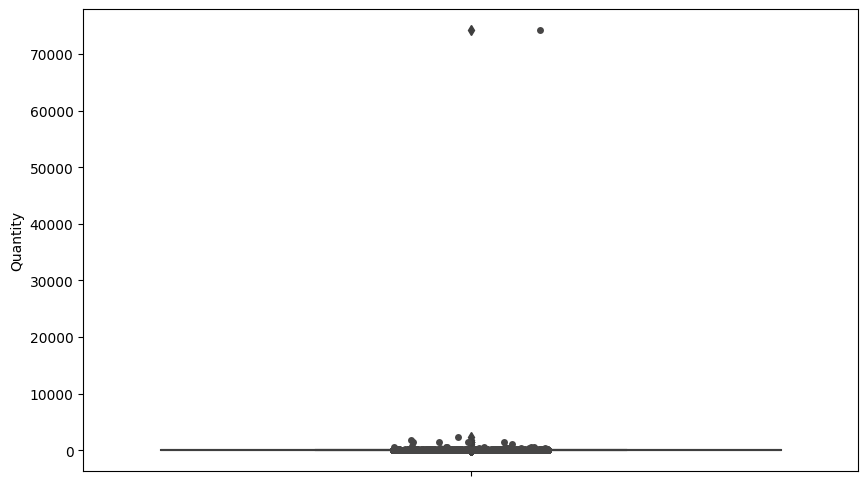

In [16]:
sns.boxplot( y='Quantity',data=df)
sns.stripplot(y='Quantity',data=df, color="#474646")

<Axes: ylabel='Quantity'>

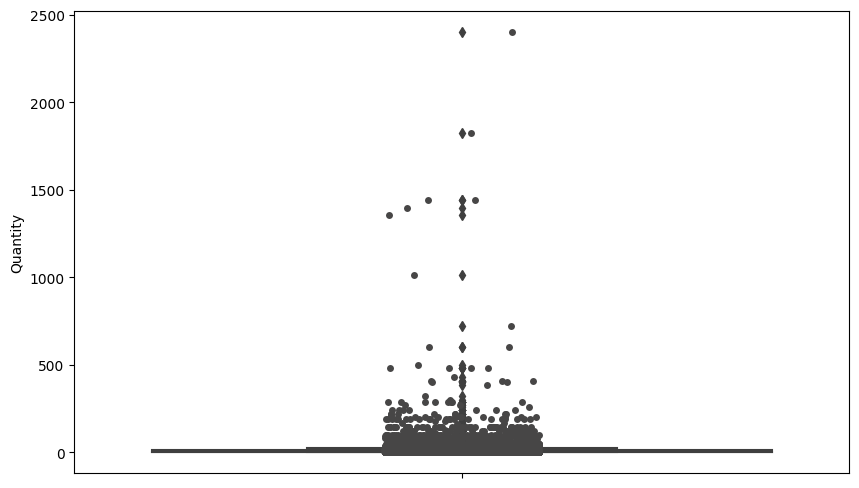

In [17]:
outliers_indices = df.loc[df['Quantity']>8000].index
df = df.drop(outliers_indices)
sns.boxplot( y='Quantity',data=df)
sns.stripplot(y='Quantity',data=df, color="#474646")

<Axes: ylabel='UnitPrice'>

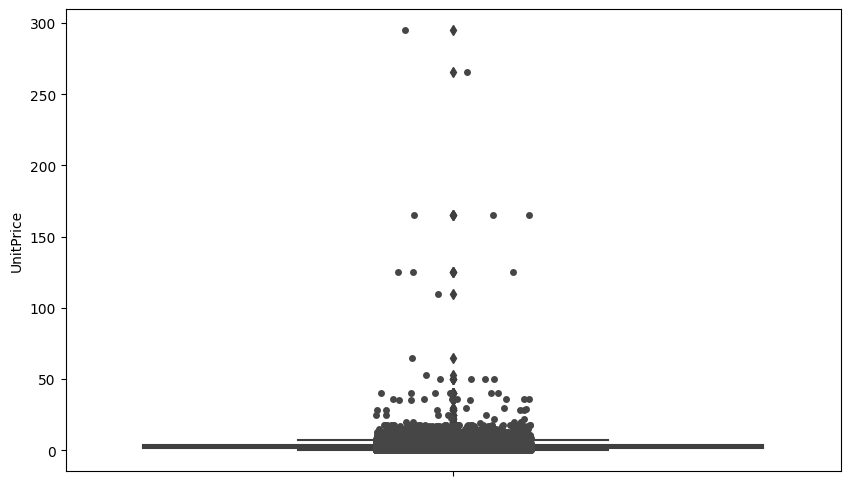

In [18]:
sns.boxplot( y='UnitPrice',data=df)
sns.stripplot(y='UnitPrice',data=df, color="#474646")

<Axes: ylabel='UnitPrice'>

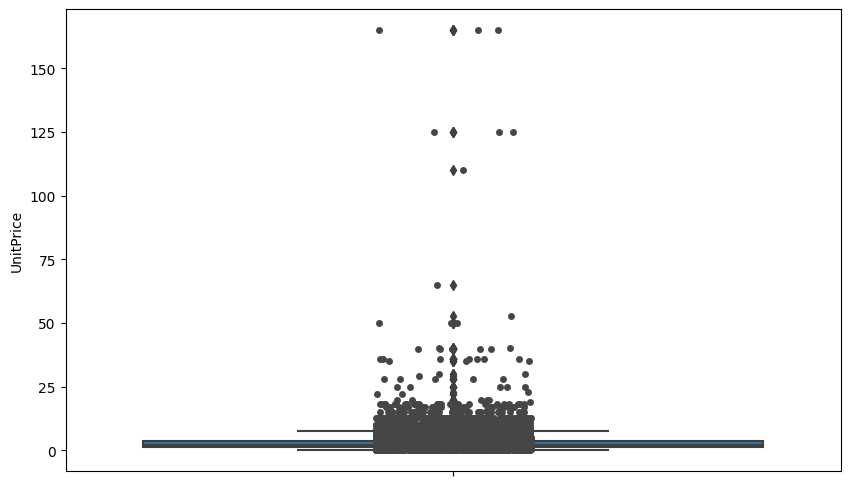

In [19]:
outliers_indices = df.loc[df['UnitPrice']>200].index
df= df.drop(outliers_indices)
sns.boxplot( y='UnitPrice',data=df)
sns.stripplot(y='UnitPrice',data=df, color="#474646")

In [20]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,12280.000000,12280.000000,12280.000000
mean,12.748127,3.136679,15385.294870
std,47.453876,4.726804,1764.122186
min,1.000000,0.070000,12347.000000
25%,2.000000,1.250000,13990.750000
50%,4.000000,1.950000,15379.000000
75%,12.000000,3.750000,17019.000000
max,2400.000000,165.000000,18283.000000


In [21]:
print(len(df))

12280


Data Preprocessing

Change the InvoiceDate column to date format

In [22]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Changing the InvoiceDate column to date format removes the outlier
Storing the RFM column in the cus_data dataframe

In [23]:
df["TotalSum"] = df["Quantity"] * df["UnitPrice"]
snapshot_date = max(df.InvoiceDate) + datetime.timedelta(days=1)

cus_data = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
                                            'InvoiceNo': 'count','TotalSum': 'sum'})
cus_data.rename(columns = {'InvoiceDate': 'Recency','InvoiceNo': 'Frequency',
                            'TotalSum': 'Monetary'}, inplace=True)

In [24]:
cus_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,508,13,364.50
12348.0,350,5,148.08
12356.0,318,10,838.56
12359.0,1,4,99.00
12370.0,353,24,464.66


In [25]:
cus_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1108 entries, 12347.0 to 18283.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    1108 non-null   int64  
 1   Frequency  1108 non-null   int64  
 2   Monetary   1108 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 34.6 KB


Normalize data with minmacscaler, and Check the normalization results

In [26]:
scaler = MinMaxScaler()
customers_norm = scaler.fit_transform(cus_data)

customers_norm

array([[0.7369186 , 0.05714286, 0.03049699],
       [0.50726744, 0.01904762, 0.01232725],
       [0.46075581, 0.04285714, 0.07029715],
       ...,
       [0.13226744, 0.03333333, 0.01279069],
       [0.69186047, 0.0047619 , 0.0057132 ],
       [0.26598837, 0.08571429, 0.00302661]])

Dataframe format of normalized data

In [27]:
customers_df = pd.DataFrame(customers_norm, columns=cus_data.columns)
customers_df

,Recency,Frequency,Monetary
0,0.736919,0.057143,0.030497
1,0.507267,0.019048,0.012327
2,0.460756,0.042857,0.070297
3,0.000000,0.014286,0.008207
4,0.511628,0.109524,0.038906
...,...,...,...
1103,0.502907,0.000000,0.000751
1104,0.691860,0.009524,0.007837
1105,0.132267,0.033333,0.012791
1106,0.691860,0.004762,0.005713


In [28]:
customers_df.describe()

,Recency,Frequency,Monetary
count,1108.000000,1108.000000,1108.000000
mean,0.491740,0.048014,0.021432
std,0.256898,0.069269,0.056113
min,0.000000,0.000000,0.000000
25%,0.354651,0.009524,0.004959
50%,0.507267,0.028571,0.009116
75%,0.646802,0.061905,0.018712
max,1.000000,1.000000,1.000000


In [29]:
print(len(customers_df))

1108


In [30]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    1108 non-null   float64
 1   Frequency  1108 non-null   float64
 2   Monetary   1108 non-null   float64
dtypes: float64(3)
memory usage: 26.1 KB


Modeling Clustering
Finding the best K by using the elbow method

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

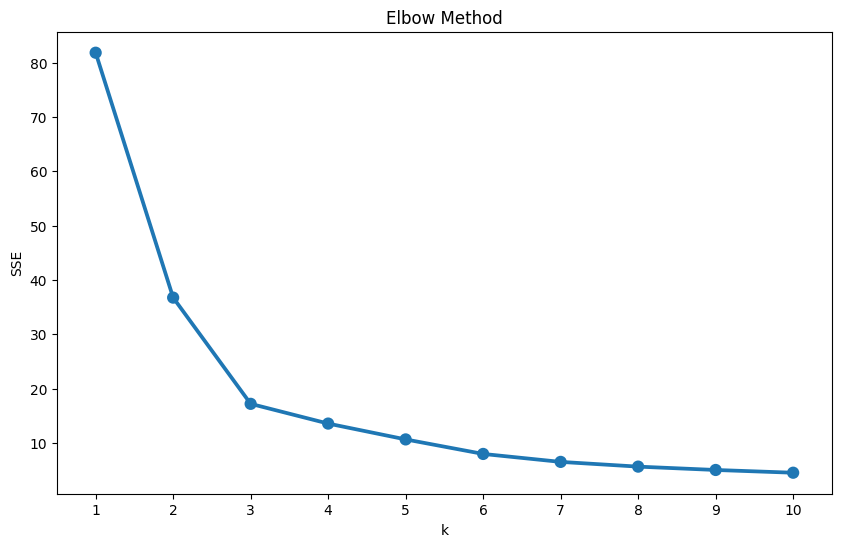

In [31]:
sse = {}
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=7)
  kmeans.fit(customers_df)
  sse[k] = kmeans.inertia_

plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show() 

From the graph above, the K value taken is K=3

In [32]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=7)
kmedoids = KMedoids(n_clusters=3)
models = [kmeans, kmedoids]
name = ["K-Means Clustering", "K-Medoids Clustering", "Accelerated K-Means"]
for i in range(2):
    models[i].fit(customers_df)
    score = silhouette_score(customers_df, models[i].labels_, metric='euclidean') 
    print(name[i], " Silhouette Score = ", score)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Clustering  Silhouette Score =  0.5898548036084759
K-Medoids Clustering  Silhouette Score =  0.5767853458499905


From the results of the comparison of the silhouette score values ​​above, both algorithm are equal in perform customer segmentation

Fit model kmeans cluster

In [33]:
kmeans.fit(customers_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=7)

Add cluster column, and Displays the average of each cluster

```
# This is formatted as code
```



In [34]:
cus_data['cluster'] = kmeans.labels_

cus_data.groupby('cluster').agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : ['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
cluster                                 
0        347.48      9.58   202.05   578
1        101.68     16.47   468.54   277
2        580.85      8.62   148.84   253

**Visualizing (KMeans)**

Look at the number of customers for each cluster

In [35]:
cus_data.cluster.value_counts()

0    578
1    277
2    253
Name: cluster, dtype: int64

In [36]:
fig = px.pie(df, values = cus_data['cluster'].value_counts(), 
             names = (cus_data['cluster'].value_counts()).index, 
             title = 'Predicted Clusters Distribution')
fig.show()

Save predicted result, and Convert Dataframe to numpy array after importing dataframe

In [37]:
y_kmeans=kmeans.fit_predict(customers_df)
customers_np = customers_df.values

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Create a visualization of all clusters

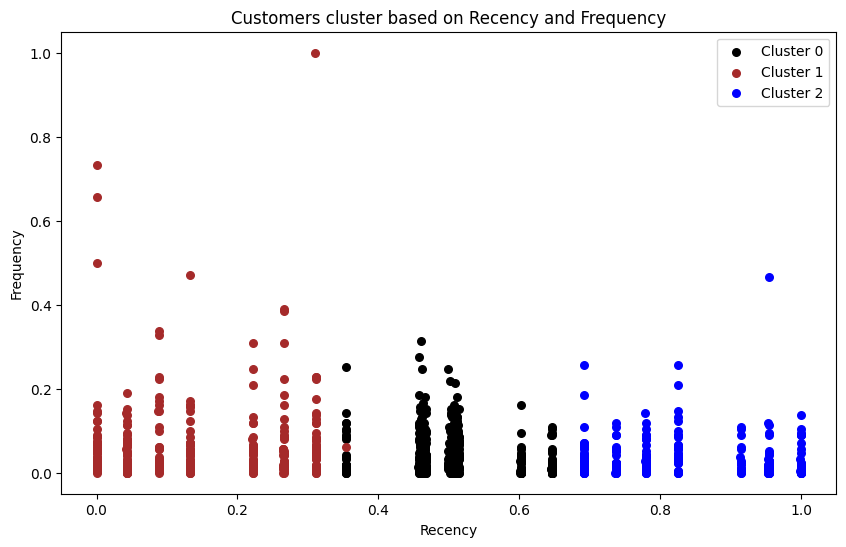

In [38]:
plt.scatter(customers_np[y_kmeans == 0, 0], customers_np[y_kmeans == 0, 1], s = 30, c = 'black', label = 'Cluster 0')
plt.scatter(customers_np[y_kmeans == 1, 0], customers_np[y_kmeans == 1, 1], s = 30, c = 'brown', label = 'Cluster 1')
plt.scatter(customers_np[y_kmeans == 2, 0], customers_np[y_kmeans == 2, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.title('Customers cluster based on Recency and Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

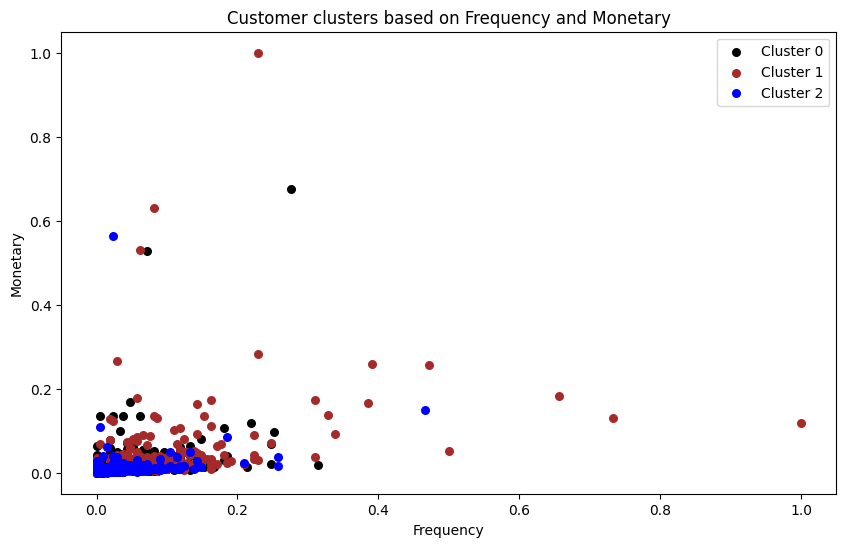

In [39]:
plt.scatter(customers_np[y_kmeans == 0, 1], customers_np[y_kmeans == 0, 2], s = 30, c = 'black', label = 'Cluster 0')
plt.scatter(customers_np[y_kmeans == 1, 1], customers_np[y_kmeans == 1, 2], s = 30, c = 'brown', label = 'Cluster 1')
plt.scatter(customers_np[y_kmeans == 2, 1], customers_np[y_kmeans == 2, 2], s = 30, c = 'blue', label = 'Cluster 2')
plt.title('Customer clusters based on Frequency and Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend()
plt.show()

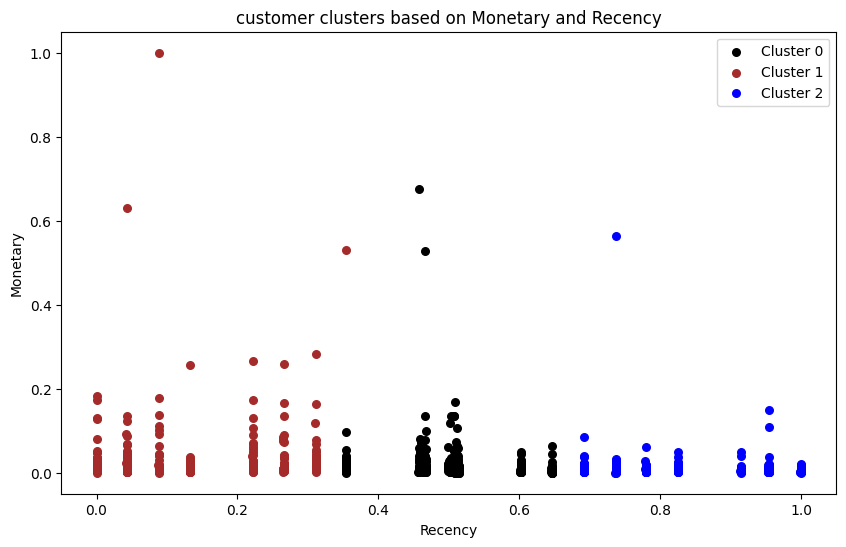

In [40]:
plt.scatter(customers_np[y_kmeans == 0, 0], customers_np[y_kmeans == 0, 2], s = 30, c = 'black', label = 'Cluster 0')
plt.scatter(customers_np[y_kmeans == 1, 0], customers_np[y_kmeans == 1, 2], s = 30, c = 'brown', label = 'Cluster 1')
plt.scatter(customers_np[y_kmeans == 2, 0], customers_np[y_kmeans == 2, 2], s = 30, c = 'blue', label = 'Cluster 2')
plt.title('customer clusters based on Monetary and Recency')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend()
plt.show()

In [41]:
plot3d_1 = go.Scatter3d(
    x= customers_df['Recency'],
    y= customers_df['Frequency'],
    z= customers_df['Monetary'],

    mode = 'markers'
)

data = [plot3d_1]
layout = go.Layout(

#     )
    title= '3D Data',
    scene = dict(
            xaxis = dict(title  = 'Recency'),
            yaxis = dict(title  = 'Frequency'),
            zaxis = dict(title  = 'Monetary')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

First, import the necessary libraries:

In [42]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split


In [43]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(customers_df)
cluster_labels = kmeans.fit_predict(customers_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [44]:
X_train, X_test, y_train, y_test = train_test_split(customers_df, cluster_labels, test_size=0.2, random_state=0)

In [45]:
clf = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr')
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [46]:
y_pred = clf.predict(X_test)

In [47]:
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9864864864864865


Load your data and cluster it using K-Means:

In [48]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(customers_df)
labels = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [49]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(customers_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Here, X is your data matrix and n_clusters is the number of clusters you want to create.

Split your data into training and testing sets:

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(customers_df, clusters, test_size=0.2, random_state=0)

Here, test_size specifies the proportion of data to be used for testing (in this case, 30%).

Train an SVM classifier on the training data:

In [51]:
clf = SVC(kernel='linear', C=1, random_state=0)
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

Here, kernel specifies the type of kernel to be used (linear in this case), and C is the regularization parameter.

Use the trained SVM to predict the clusters of new data points:

In [52]:
y_pred = clf.predict(X_test)

Here, X_test is the new data matrix.

Evaluate the performance of the SVM:

In [53]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.99


Here, accuracy_score computes the accuracy of the classifier, and the result is printed.

Note that in this example, we assumed that the number of clusters is known and fixed (i.e., 3 clusters). If you don't know the number of clusters in advance, you may need to use a clustering algorithm that automatically determines the number of clusters (e.g., DBSCAN or hierarchical clustering).

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 55   0   0]
 [  0  45   0]
 [  0   3 119]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.94      1.00      0.97        45
           2       1.00      0.98      0.99       122

    accuracy                           0.99       222
   macro avg       0.98      0.99      0.99       222
weighted avg       0.99      0.99      0.99       222



<Axes: >

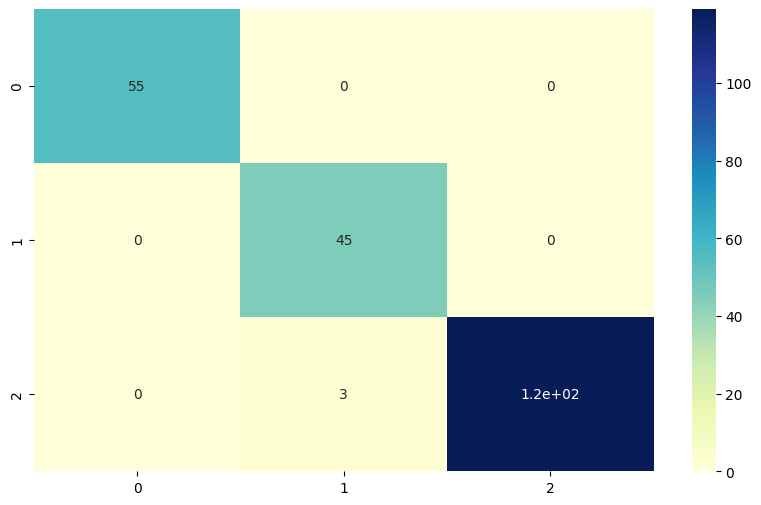

In [56]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")


**bold text**

In [ ]:
Get the feature imprtance scores

In [60]:
importances = abs(clf.coef_[0])

In [61]:
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]

In [62]:
feature_names = X_train.columns[sorted_indices]

[5.25257876e+00 2.88522193e-03 9.96566621e-04] 



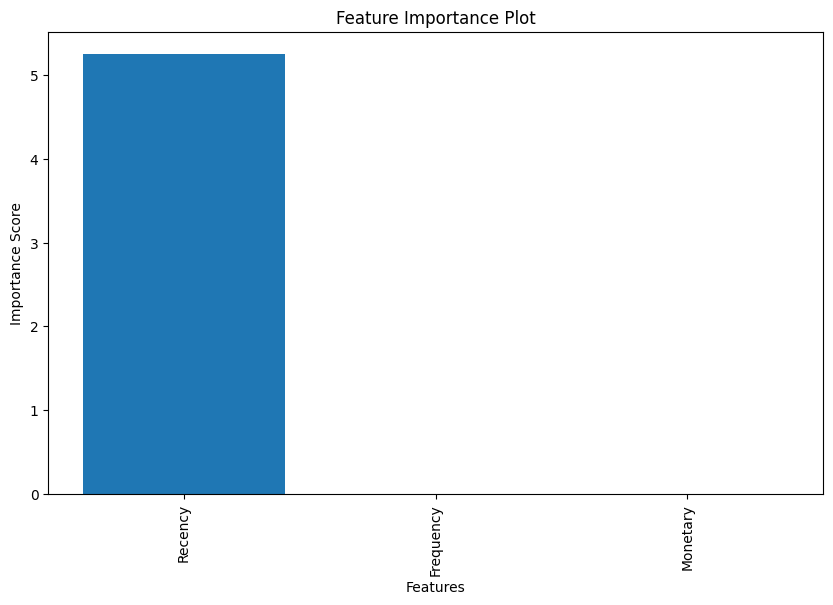

In [64]:

import matplotlib.pyplot as plt
print(importances,'\n')
plt.bar(feature_names, sorted_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Plot')
plt.show()
     